In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [234]:
data=pd.read_csv("AirPassengers.csv")

In [235]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [236]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

<ipython-input-236-9b71f5305629>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)


In [237]:
IndexData=data.set_index(['Month'])

In [238]:
from datetime import datetime
IndexData.head(30)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


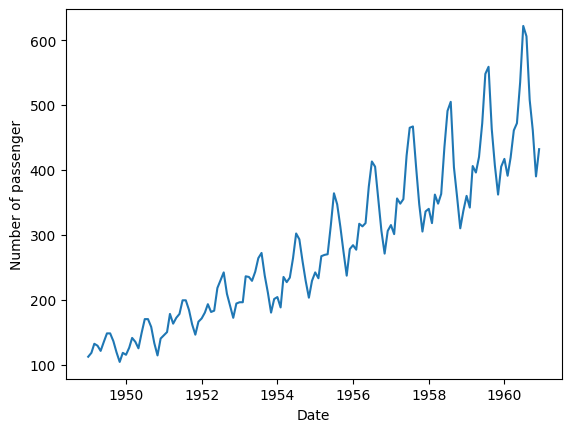

In [239]:
plt.xlabel('Date')
plt.ylabel('Number of passenger')
plt.plot(IndexData)

In [240]:
rolmean=IndexData.rolling(window=12).mean()
rolstd=IndexData.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


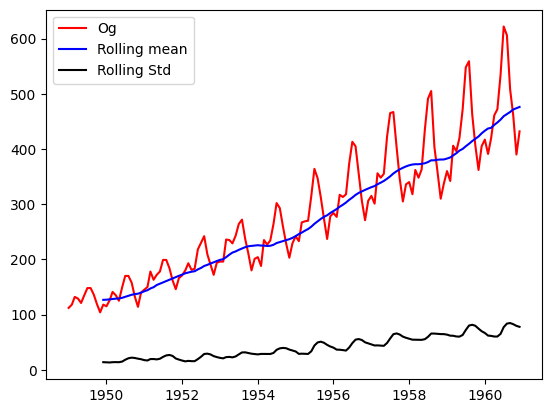

In [241]:
#rolling stat
orginal=plt.plot(IndexData, color='red', label ='Og')
mean=plt.plot(rolmean, color='blue', label="Rolling mean")
std=plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.show()


# we use # conclude the data is not stationary

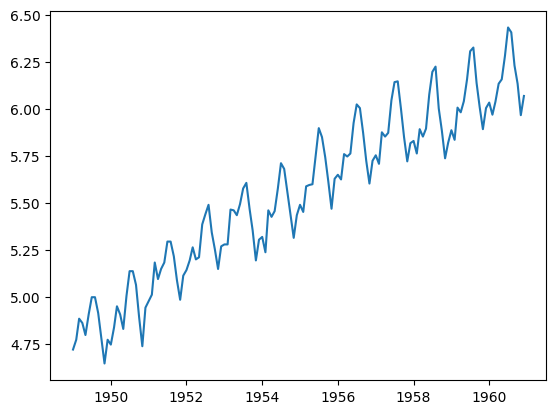

In [242]:
# we use the log
IndexData_logScale=np.log(IndexData)
plt.plot(IndexData_logScale)

In [243]:
Movingavg= IndexData_logScale.rolling(window=12).mean()
movingstd= IndexData_logScale.rolling(window=12).std()

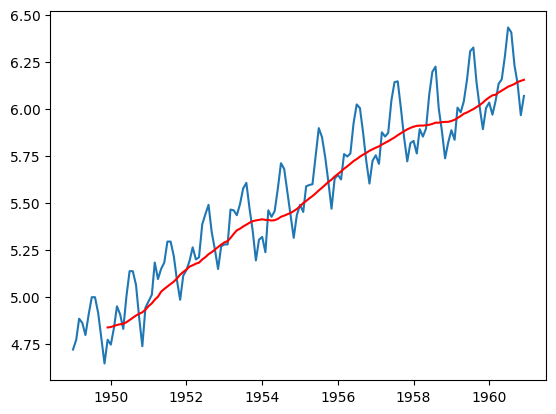

In [244]:
plt.plot(IndexData_logScale)
plt.plot(Movingavg, color='red')
#plt.plot(movingstd,color='cyan')

# mean is not stationary as it moves with time

In [245]:
# for getting time series as stationary
dataset_Log_minus_moving_avg= IndexData_logScale-Movingavg
dataset_Log_minus_moving_avg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [246]:
# rempove nan
dataset_Log_minus_moving_avg.dropna(inplace=True)
dataset_Log_minus_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


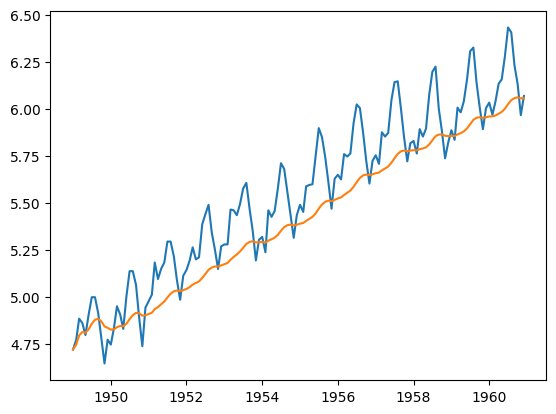

In [247]:
 exponential_decay_weighted_avg=IndexData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
 plt.plot(IndexData_logScale)
 plt.plot(exponential_decay_weighted_avg)

In [248]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexData_logScale)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

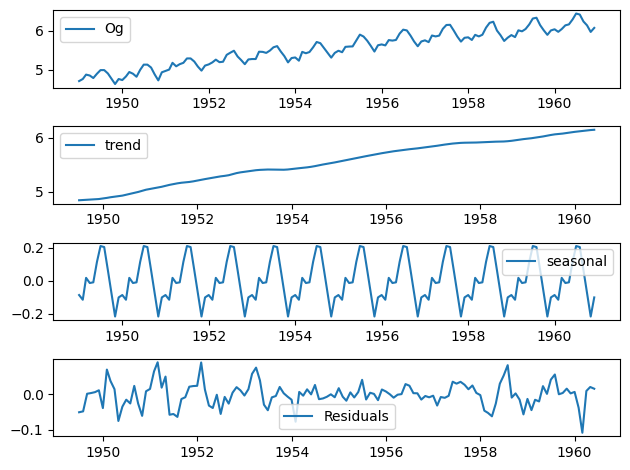

In [249]:
plt.subplot(411)
plt.plot(IndexData_logScale, label='Og')
plt.legend(loc='best')
plt.subplot(412)

plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)

plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)

plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [250]:
# from statsmodels.tsa.arima_model import ARIMA

# #AR Model

# model= ARIMA(IndexData_logScale, order=(2,1,2))
# results_AR=model.fit(disp=-1)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS:%.4f'% sum(results_AR.fittedvalues- dataset))

In [251]:
IndexData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


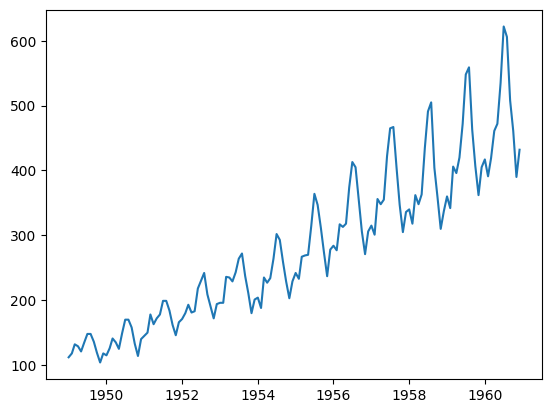

In [252]:
plt.plot(IndexData)

In [253]:
#AS we can see it is a trend following time series data and from the above code we have concluded that it is not stationary

In [254]:
#TO make it stationary we will perform Augmented Dicky Fuller Test

In [255]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(IndexData)
print(result[0])
print(result[1]) #As it is greater than 0.05 we will have to differencing and check it again with adfuller test

0.8153688792060498
0.991880243437641


In [256]:
#First Differencing
IndexData['first_difference']=IndexData['#Passengers']-IndexData['#Passengers'].shift(1)
IndexData.head()

,#Passengers,first_difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [257]:
result=adfuller(IndexData['first_difference'].dropna())
print(result[0])
print(result[1]) #As it is greater than 0.05 we will have to differencing and check it again with adfuller test

-2.8292668241700047
0.05421329028382478


In [258]:
#Second Differencing
#First differencing waale column pe shift operation lagaayege
IndexData['second_difference']=IndexData['first_difference']-IndexData['first_difference'].shift(1)
IndexData.head()

,#Passengers,first_difference,second_difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [259]:
#Again we do the adfuller test for the second time :
result=adfuller(IndexData['second_difference'].dropna())
print(result[0])
print(result[1])

#We can see now it is less than 0.05 which means that the second differencing column is a stationary data

-16.384231542468513
2.7328918500142026e-29


### Ater differencing two times our value became less than 0.05 , so our d parameter is equal to 2

In [260]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

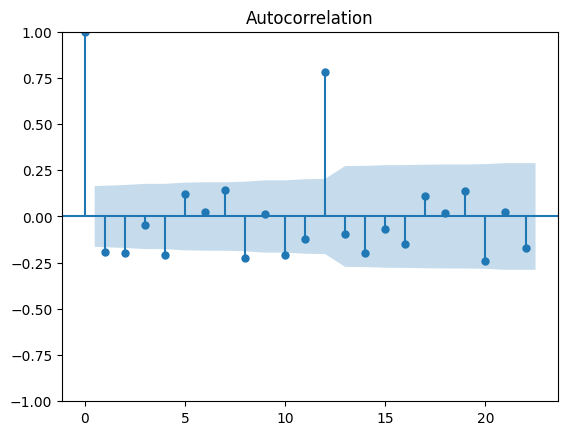

In [261]:

acf=plot_acf(IndexData['second_difference'].dropna())

#Now we can see after 12 points there are sudden changes which needs to be our q parameter

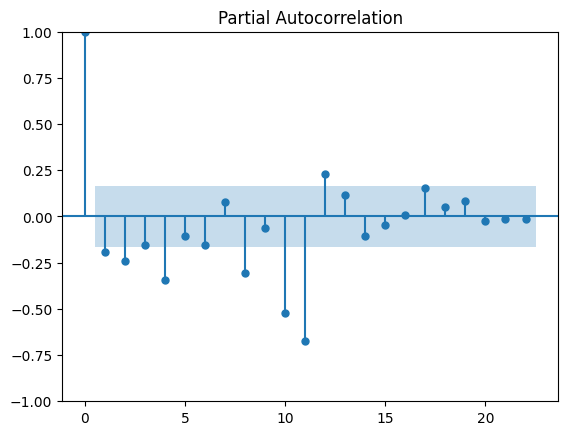

In [262]:
pacf=plot_pacf(IndexData['second_difference'].dropna())

#We have to observe values whenever they are crossing the upper and lower bounds for our p parameter


In [263]:
from statsmodels.tsa.arima.model import ARIMA

In [264]:
#pd.date_range(start=start_date,end=end_date,freq='MS') //-> Function for constructing dates

In [265]:
new_data=IndexData.drop(['first_difference','second_difference'],axis=1)

In [266]:
train_data=new_data['1949-01-01':'1960-01-01']
test_data=new_data['1960-02-01':'1960-12-01']

In [267]:
#From the above pacf and acf graphs ,there are 2 values of p for which the values could be checked in arima order i.e 11 and 12 so we should check by AIC and BIC

In [268]:
model1=ARIMA(train_data,order=(11,2,12))
model2=ARIMA(train_data,order=(12,2,12))

result1=model1.fit()
result2=model2.fit()



aic1=result1.aic
bic1=result1.bic

aic2=result2.aic
bic2=result2.bic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [269]:
print(aic1)
print(aic2)
if(aic1>aic2):
  print('model 2 has lower aic value,hence a better model')
else:
  print('model 1 has lower aic value,hence a better model')

1039.8907438903332
1038.9063338729961
model 2 has lower aic value,hence a better model


In [270]:
print(bic1)
print(bic2)
if(bic1>bic2):
  print('model 2 has lower bic value,hence a better model')
else:
  print('model 1 has lower bic value,hence a better model')

1108.8954796471608
1110.786266953025
model 1 has lower bic value,hence a better model


In [271]:
#So we should move ahead with order (11,2,12) as AIC has about 0.9 difference and bic has 2.1 difference and graph of this order looks better fitted

In [272]:
model=ARIMA(train_data,order=(11,2,12))
result=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

In [273]:
forecast =result.predict(start='1960-02-01', end='1960-12-01', dynamic=True)

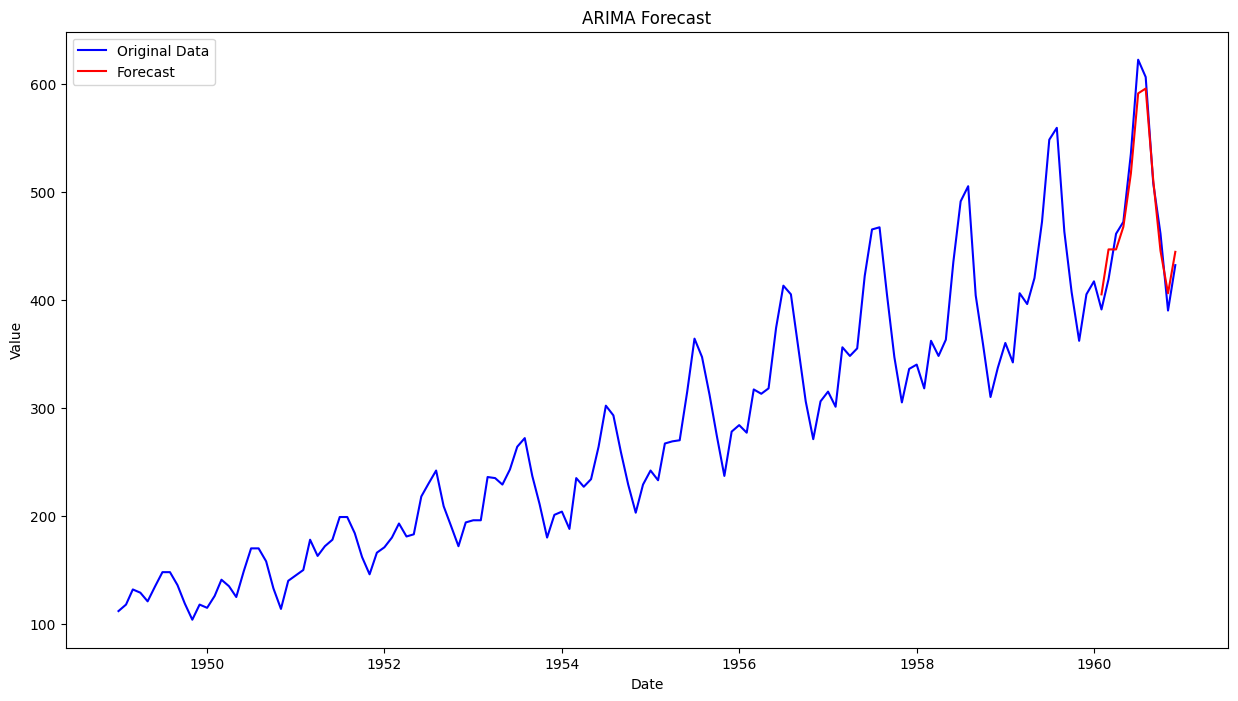

In [274]:
plt.figure(figsize=(15, 8))
plt.plot(IndexData.index, IndexData['#Passengers'], label='Original Data', color='blue')

plt.plot(forecast.index, forecast, label='Forecast', color='red')

plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show plot
plt.show()

In [275]:
forecast

1960-02-01    404.941100
1960-03-01    446.562915
1960-04-01    446.523657
1960-05-01    467.363338
1960-06-01    516.658824
1960-07-01    590.888739
1960-08-01    595.354273
1960-09-01    510.811887
1960-10-01    445.225225
1960-11-01    405.972622
1960-12-01    444.274301
Freq: MS, Name: predicted_mean, dtype: float64